# POST - TEST 8 KB
## DNN
## 2109106036 - EKLECCIA R

### LIBRARIES YANG DIGUNAKAN

In [1]:
# Importing libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds
from tensorflow import keras
import matplotlib.pyplot as plt

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bucc',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar100_n',
 'cifar10_1',
 'cifar10_corrupted',
 'cifar10_n',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'conll2003',
 'controlled_noisy_web_labels',
 'coqa',
 'cos_e',
 'cos

## KLASIFIKASI DATA TFDS FLOWERS
### Dengan split train 70% dan test 70%

In [3]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = tfds.load(
    'tf_flowers',
    split=['train[:70%]', 'train[70%:]'],
    batch_size = -1,
    as_supervised=True,
)


## RESHAPE Dataset

In [4]:
x_train_raw.shape

TensorShape([2569, 442, 1024, 3])

In [5]:
x_test_raw.shape

TensorShape([1101, 441, 640, 3])

In [70]:
x_train = tf.image.resize(x_train_raw, (28, 28))
x_test = tf.image.resize(x_test_raw, (28, 28))

x_train = np.reshape(x_train.numpy(), (2569, 2352))
x_test = np.reshape(x_test.numpy(), (1101, 2352))


# Encoding Labels

In [71]:
y_train = keras.utils.to_categorical(y_train_raw, 5)
y_test = keras.utils.to_categorical (y_test_raw, 5)

In [72]:
(training_set, test_set), info = tfds.load(
    'tf_flowers',
    split=['train[:70%]', 'train[70%:]'],
    with_info=True,
    as_supervised=True,
)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20840\1377319936.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, x+1)


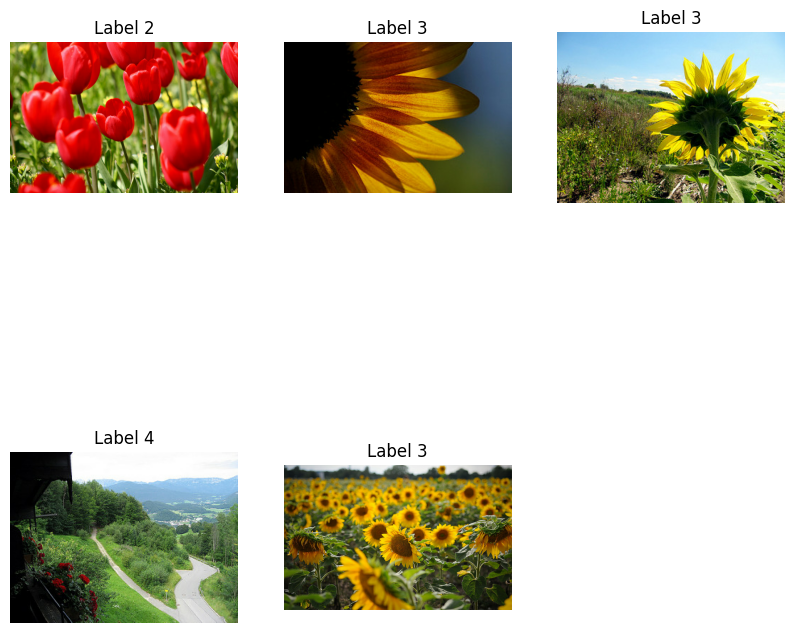

In [73]:
x = 0
plt.rcParams["figure.figsize"] = [10, 10]


for image, label in training_set:
    plt.axis('off')
    image = image.numpy()
    plt.subplot(2, 3, x+1)

    plt.title('Label {}'.format(label))
    plt.imshow(image, cmap=plt.cm.binary)
    plt.axis('off')
    x += 1
    if x == 5:
        break


plt.show()

## Membuat Modelling

In [124]:
from tensorflow.keras import Sequential
model_flowers = Sequential()

In [125]:
# Input Layer
from tensorflow.keras.layers import Dense
model_flowers.add(Dense(256, activation='relu', input_dim=2352))

In [126]:
# Hidden Layer
model_flowers.add(Dense(128, activation = 'relu'))
model_flowers.add(Dense(32, activation = 'relu'))

In [127]:
# Output layer
model_flowers.add(Dense(5, activation = 'softmax'))

## Summary Models

In [128]:
model_flowers.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 256)               602368    
                                                                 
 dense_46 (Dense)            (None, 128)               32896     
                                                                 
 dense_47 (Dense)            (None, 32)                4128      
                                                                 
 dense_48 (Dense)            (None, 5)                 165       
                                                                 
Total params: 639,557
Trainable params: 639,557
Non-trainable params: 0
_________________________________________________________________


## Compile Models

In [129]:
model_flowers.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [133]:
model_flowers.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/20
21/21 [==============================] - 0s 17ms/step - loss: 1.6006 - accuracy: 0.2487 - val_loss: 1.6006 - val_accuracy: 0.2352
Epoch 2/20
21/21 [==============================] - 0s 14ms/step - loss: 1.6006 - accuracy: 0.2487 - val_loss: 1.6006 - val_accuracy: 0.2352
Epoch 3/20
21/21 [==============================] - 0s 14ms/step - loss: 1.6006 - accuracy: 0.2487 - val_loss: 1.6005 - val_accuracy: 0.2352
Epoch 4/20
21/21 [==============================] - 0s 17ms/step - loss: 1.6006 - accuracy: 0.2487 - val_loss: 1.6005 - val_accuracy: 0.2352
Epoch 5/20
21/21 [==============================] - 0s 14ms/step - loss: 1.6006 - accuracy: 0.2487 - val_loss: 1.6005 - val_accuracy: 0.2352
Epoch 6/20
21/21 [==============================] - 0s 15ms/step - loss: 1.6006 - accuracy: 0.2487 - val_loss: 1.6005 - val_accuracy: 0.2352
Epoch 7/20
21/21 [==============================] - 0s 14ms/step - loss: 1.6006 - accuracy: 0.2487 - val_loss: 1.6007 - val_accuracy: 0.2352
Epoch 8/20
21